<a href="https://colab.research.google.com/github/fagonzalezo/qmc/blob/master/examples/qmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Install qmc if running in Google Colab

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    !rm -R qmc qmc1
    !git clone https://github.com/fagonzalezo/qmc.git
    !mv qmc qmc1
    !mv qmc1/qmc .
else:
    import sys
    sys.path.insert(0, "../")

Cloning into 'qmc'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 36 (delta 7), reused 30 (delta 5), pack-reused 0
Unpacking objects: 100% (36/36), done.


In [17]:
%matplotlib inline
import numpy as np
import pylab as pl

# Function to visualize a 2D dataset
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")
    
# Function to visualize the decission surface of a classifier
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 50)
    y_vals = np.linspace(min_y, max_y, 50)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    vals = [[XX[i, j], YY[i, j]] for i in range(grid_r) for j in range(grid_c)]
    preds = pred_fun(np.array(vals))
    ZZ = np.reshape(preds, (grid_r, grid_c))
    print(np.min(preds), np.min(ZZ))
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    CS = pl.contour(XX, YY, ZZ, 100, levels = [0.1*i for i in range(1,10)])
    pl.clabel(CS, inline=1, fontsize=10)
    pl.xlabel("x")
    pl.ylabel("y")

def gen_pred_fun(clf):
    def pred_fun(X):
        return clf.predict(X)[:, 1]
    return pred_fun

### Two moons example

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import qmc.tf.layers as layers
import qmc.tf.models as models


/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.CrossProduct.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))
/usr/local/lib/python3.6/dist-packages/typeguard/__init__.py:804: UserWarning: no type annotations present -- not typechecking qmc.tf.layers.DensityMatrix2Dist.__init__
  warn('no type annotations present -- not typechecking {}'.format(function_name(func)))


In [19]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=42)
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

In [20]:
#fm_x = layers.QFeatureMapRFF(dim=1000, gamma=100)
fm_x = layers.QFeatureMapSmp(dim=4, beta=40)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
#fm_y = lambda x: tf.squeeze(tf.keras.backend.one_hot(x, 2))
qmc = models.QMClassifier(fm_x, fm_y, dim_y=2)
out = qmc(X_train)
qmc.compile()
qmc.fit(X_train, y_train, epochs=1)
out = qmc.predict(X_test)
print(out[:10])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11/11 [==============================] - 0s 2ms/step
[[0.1219994  0.8780005 ]
 [0.10922977 0.8907702 ]
 [0.94137603 0.05862399]
 [0.70351374 0.29648632]
 [0.22973317 0.7702668 ]
 [0.90572494 0.09427501]
 [0.7731834  0.22681665]
 [0.12236177 0.8776382 ]
 [0.7033099  0.2966901 ]
 [0.07239991 0.92759997]]


In [21]:
accuracy_score(y_test, out[:,1] >= 0.5)

0.8848484848484849

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.00320639 0.00320639


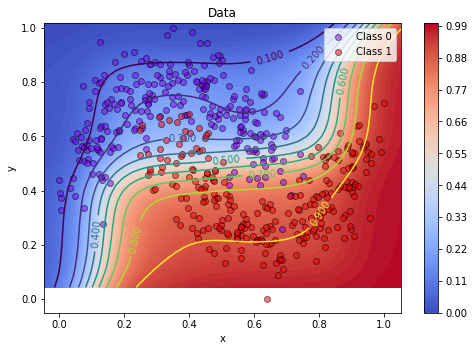

In [22]:
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc))
plot_data(X, y)

In [28]:
fm_x = layers.QFeatureMapRFF(dim=1000, gamma=20, random_state=17)
fm_y = layers.QFeatureMapOneHot(num_classes=2)
qmc = models.QMClassifier(fm_x, fm_y, dim_y=2)
out = qmc(X_train[:2,:])
qmc.compile()
qmc.fit(X_train, y_train, epochs=1)
out = qmc.predict(X_test)
print(out[:10])



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

11/11 [==============================] - 0s 5ms/step
[[0.07758499 0.922415  ]
 [0.04890675 0.95109326]
 [0.9623599  0.03764012]
 [0.8379851  0.16201493]
 [0.26978195 0.73021805]
 [0.9196203  0.08037972]
 [0.8233094  0.17669052]
 [0.07841362 0.9215864 ]
 [0.6326829  0.36731714]
 [0.0310195  0.96898043]]


0.9272727272727272


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


0.008652683 0.008652683


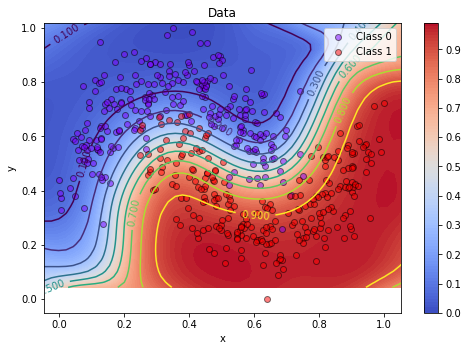

In [29]:
print(accuracy_score(y_test, out[:,1] >= 0.5))
pl.figure(figsize = (8,16/3))    
plot_decision_region(X_test, gen_pred_fun(qmc))
plot_data(X, y)